In [89]:
## Import Libraries
# Array + Math
import numpy as np
# Plotting
import matplotlib.pyplot as plt
'%matplotlib inline'
# Pandas
import pandas as pd

In [90]:
## Generate Random Data
# 100 Uniform Distributed Random Numbers ranging 0 and 2
x = 2 * np.random.rand(100,1)
# f(x) = 4 + 3*x + noise, noise is uniform distributed between 0 . and 1
y = 4 + 3*x +np.random.rand(100,1)

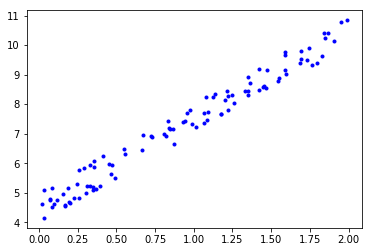

In [91]:
## Plotting x and y without connecting lines
plt.plot(x,y,'b.')
plt.show()

In [92]:
X_b = np.c_[np.ones((100,1)),x]

In [93]:
# Determine Parameters using Linear Algebra
theta_best = np.linalg.inv(((X_b).T).dot(X_b)).dot(X_b.T).dot(y)
# Should be close to [4,3]
theta_best

array([[4.45113862],
       [3.04187147]])

In [94]:
x_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),x_new]
X_new_b
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.45113862],
       [10.53488155]])

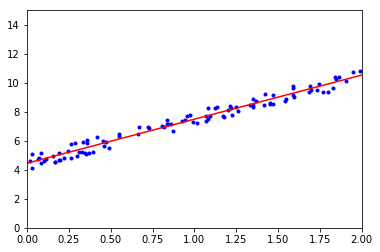

In [95]:
## Plotting x and y without connecting lines
plt.plot(x,y,'b.')
plt.plot(x_new,y_predict,'-r')
plt.axis([0,2,0,15])
plt.show()

## Gradient Descent

In [112]:
## Function to calculate the error
def cal_cost (theta,X,y):
    '''
    theta: column-vector (n x 1) of proposed parameters for model
    X    :  
    y    :
    '''     
    # Number of observations in set
    m = len(y)
    # predicted y values
    y_predict = X.dot(theta)
    # Calculate Cost
    cost = (1/(2*m))*np.sum(np.square(y_predict - y))
    return cost

In [113]:
## Function to apply gradient descent, 
def gradescent (theta , X , y , iterations = 100 , learning_rate = 0.01):
    # Number of observations
    m = len(y)
    # Vector to store costs in
    cost_history  = np.zeros(iterations)
    # Vector to store thetas in
    theta_history = np.zeros((iterations,2))    
    # Do the actual work
    for itx in range(iterations):
        # Make Prediction with this iterations theta
        y_predict = X.dot(theta)   # same as np.dot(X,theta)
        # Calculate new Theta
        theta = theta - learning_rate*(1/m)*((X.T).dot(y_predict - y))
        # Calculate Cost of this iteration and save it in vector
        cost_history[itx] = cal_cost(theta,X,y)
        # Save Theta of this iteration in Vector
        theta_history[itx,:] = theta.T
    # Return results
    return theta, cost_history, theta_history

In [135]:
# Create input Date for Gradiate Descent
lr     = 0.01
n_iter = 100
theta  = np.random.randn(2,1)

In [136]:
theta, cost_history, theta_history = gradescent (theta = theta, 
                                                 X = X_b,
                                                 y = y,
                                                 iterations = n_iter,
                                                 learning_rate = lr)
print("\nFinal Theta:\n",theta)
print("\nFinal Cost :\n",cost_history[-1])


Final Theta:
 [[3.68379499]
 [3.02347541]]

Final Cost :
 0.3563984910259546


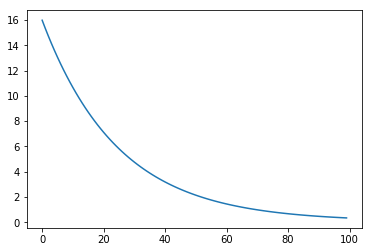

In [137]:
## Plotting Costhistory
plt.plot(cost_history)
plt.show()

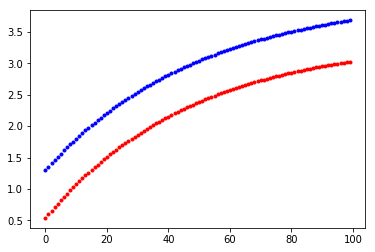

In [144]:
## Plotting Costhistory
plt.plot(theta_history[:,0],'b.')
plt.plot(theta_history[:,1],'r.')
plt.show()